In [1]:
from os.path import join,exists,realpath,dirname,basename
from os import makedirs,listdir, system
import numpy as np, cPickle, editdistance, seaborn as sns
import matplotlib.pyplot as plt, pandas as pd, itertools, glob, h5py
from scipy.stats import entropy
from matplotlib.font_manager import FontProperties
from IPython.display import display
from collections import defaultdict
from IPython.display import display
from itertools import izip
from scipy.stats import ranksums
import multiprocessing as mp
from PIL import Image
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
system('cp ../script/inception_score.py .')
import inception_score

In [2]:
rundir = '/cluster/zeng/code/research/OFTL-GAN/script/cifar10/'

### Inception score comparision

In [3]:
def visualize_inception(improved_keras_dir, t_n_epoch, plot=True):
    score = []
    for i in range(t_n_epoch):
        scorefile = join(improved_keras_dir, 'epoch_{}.score'.format(i))
        if not exists(scorefile):   
            datafile = join(improved_keras_dir, 'epoch_{}.pkl'.format(i))
            if not exists(datafile):
                break
            with open(datafile) as f:
                sample = cPickle.load(f)
                t_score = inception_score.get_inception_score(list(sample), 1)[0]
            with open(scorefile, 'w') as f:
                f.write('%f\n' % t_score)
        else:
            with open(scorefile) as f:
                t_score = float(f.readline())
        score.append(t_score)
    if plot:
        plt.plot(range(len(score)), score)
        plt.show()
    else:
        return score

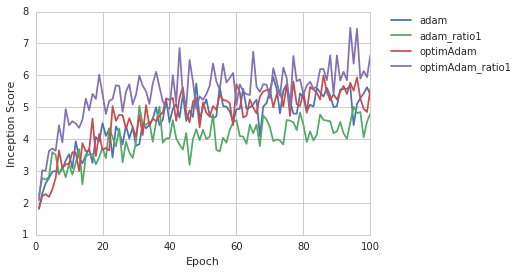

In [4]:
expt2plot = ['adam',  'adam_ratio1', 'optimAdam', 'optimAdam_ratio1']

e = 100
for expt in expt2plot:
    score = visualize_inception(join(rundir, expt), e, plot=False)
    plt.plot(np.asarray(range(len(score)))+1,score, label=expt)

lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.xlabel('Epoch')
plt.ylabel('Inception Score')
#plt.savefig('optimAdam.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Visualize the images generated from different models at epoch 19

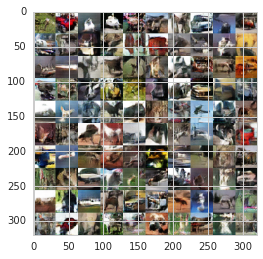

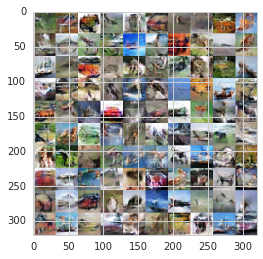

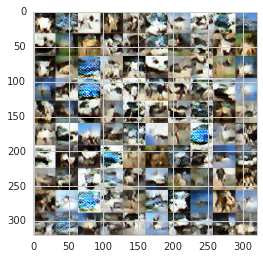

In [6]:
t_n_epoch = 19
methods = ['optimAdam_ratio1', 'adam', 'adam_ratio1']
for method in methods:
    improved_keras_dir = join(rundir, method)
    with open(join(improved_keras_dir, 'epoch_{}.pkl'.format(t_n_epoch))) as f:
        sample = cPickle.load(f)
        t_sample = np.concatenate(
            np.asarray([np.concatenate(sample[(i*10):(i*10+10)], axis=1) for i in range(10)]),
            axis=0)
        tiled_output = Image.fromarray(t_sample)  # L specifies greyscale
        outfile = method+'_epoch{}.eps'.format(t_n_epoch)
        #tiled_output.save(outfile)
        plt.imshow(t_sample)
        plt.show()